In [5]:
!python3 -m pip install scikit-learn

In [8]:
!pip install scikit-dimension

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 27.1 kB/s eta 0:00:00 kB/s eta 0:00:010:01


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import datasets
import ipywidgets as widgets
from ipywidgets import interact

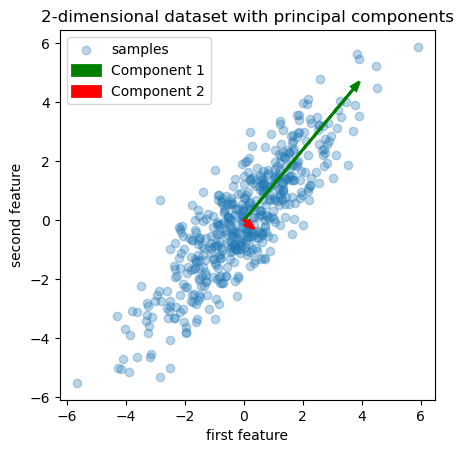

In [23]:
rng = np.random.RandomState(42)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    arrow_color = 'green' if i == 0 else 'red'
    plt.arrow(
        0, 0, comp[0], comp[1],
        head_width=0.2, head_length=0.3,
        fc=arrow_color, ec=arrow_color,
        length_includes_head=True,
        label=f"Component {i+1}",
        linewidth=2,
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

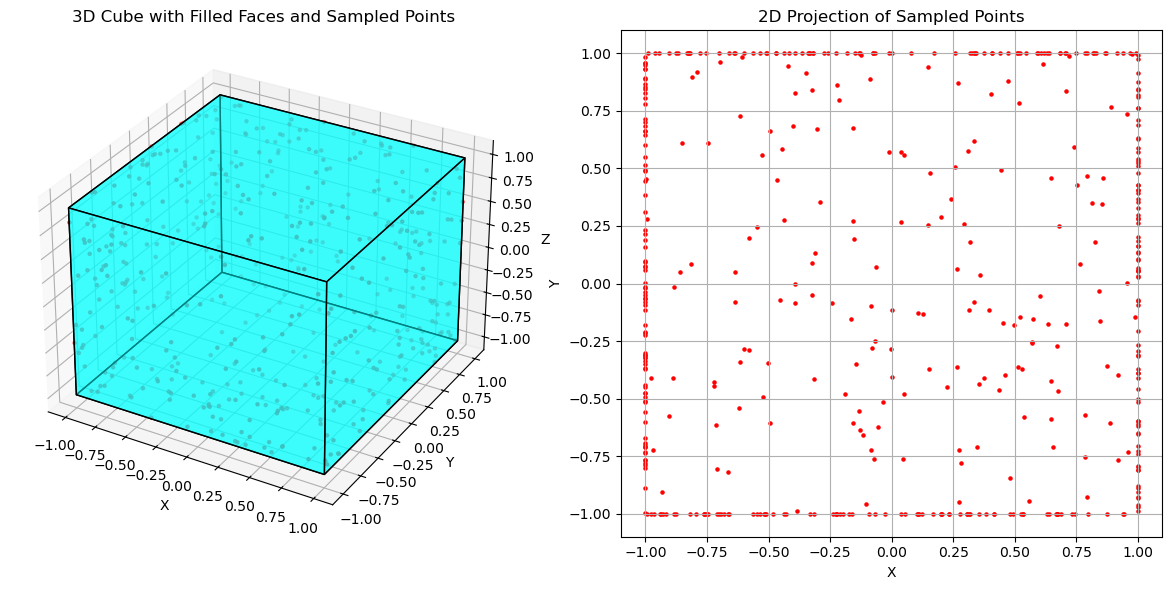

In [22]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Generate a cube with filled faces and sampled points on its surfaces
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')

# Define the vertices of the cube
vertices = np.array([
    [-1, -1, -1],
    [-1, -1,  1],
    [-1,  1, -1],
    [-1,  1,  1],
    [ 1, -1, -1],
    [ 1, -1,  1],
    [ 1,  1, -1],
    [ 1,  1,  1],
])

# Define the six faces of the cube
faces = [
    [vertices[0], vertices[1], vertices[3], vertices[2]],  # -X face
    [vertices[4], vertices[5], vertices[7], vertices[6]],  # +X face
    [vertices[0], vertices[1], vertices[5], vertices[4]],  # -Y face
    [vertices[2], vertices[3], vertices[7], vertices[6]],  # +Y face
    [vertices[0], vertices[2], vertices[6], vertices[4]],  # -Z face
    [vertices[1], vertices[3], vertices[7], vertices[5]],  # +Z face
]

# Add filled faces to the cube
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', edgecolors='k', alpha=0.5))

# Sample points on the surfaces of the cube
num_points = 500
samples = []
for x in [-1, 1]:
    y = np.random.uniform(-1, 1, num_points // 6)
    z = np.random.uniform(-1, 1, num_points // 6)
    samples.append(np.column_stack((np.full_like(y, x), y, z)))
for y in [-1, 1]:
    x = np.random.uniform(-1, 1, num_points // 6)
    z = np.random.uniform(-1, 1, num_points // 6)
    samples.append(np.column_stack((x, np.full_like(x, y), z)))
for z in [-1, 1]:
    x = np.random.uniform(-1, 1, num_points // 6)
    y = np.random.uniform(-1, 1, num_points // 6)
    samples.append(np.column_stack((x, y, np.full_like(x, z))))
sampled_points = np.vstack(samples)

# Plot the sampled points
ax.scatter(sampled_points[:, 0], sampled_points[:, 1], sampled_points[:, 2], c='r', s=5)
ax.set_title('3D Cube with Filled Faces and Sampled Points')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 2D Projection of Sampled Points
plt.subplot(122)
plt.scatter(sampled_points[:, 0], sampled_points[:, 1], c='r', s=5)
plt.title('2D Projection of Sampled Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

plt.tight_layout()
plt.show()


The green and red arrows represent the first and second principal components, respectively. The length of the arrows indicates the amount of variance captured by each principal component, with the first one capturing more variance, as it is longer.

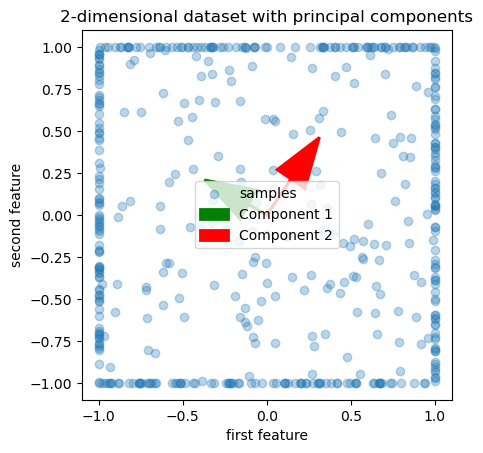

[0.62250453 0.55957368]


In [27]:
X = sampled_points

pca = PCA(n_components=2).fit(X)

plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    arrow_color = 'green' if i == 0 else 'red'
    plt.arrow(
        0, 0, comp[0], comp[1],
        head_width=0.2, head_length=0.3,
        fc=arrow_color, ec=arrow_color,
        length_includes_head=True,
        label=f"Component {i+1}",
        linewidth=2,
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()
print(pca.explained_variance_)

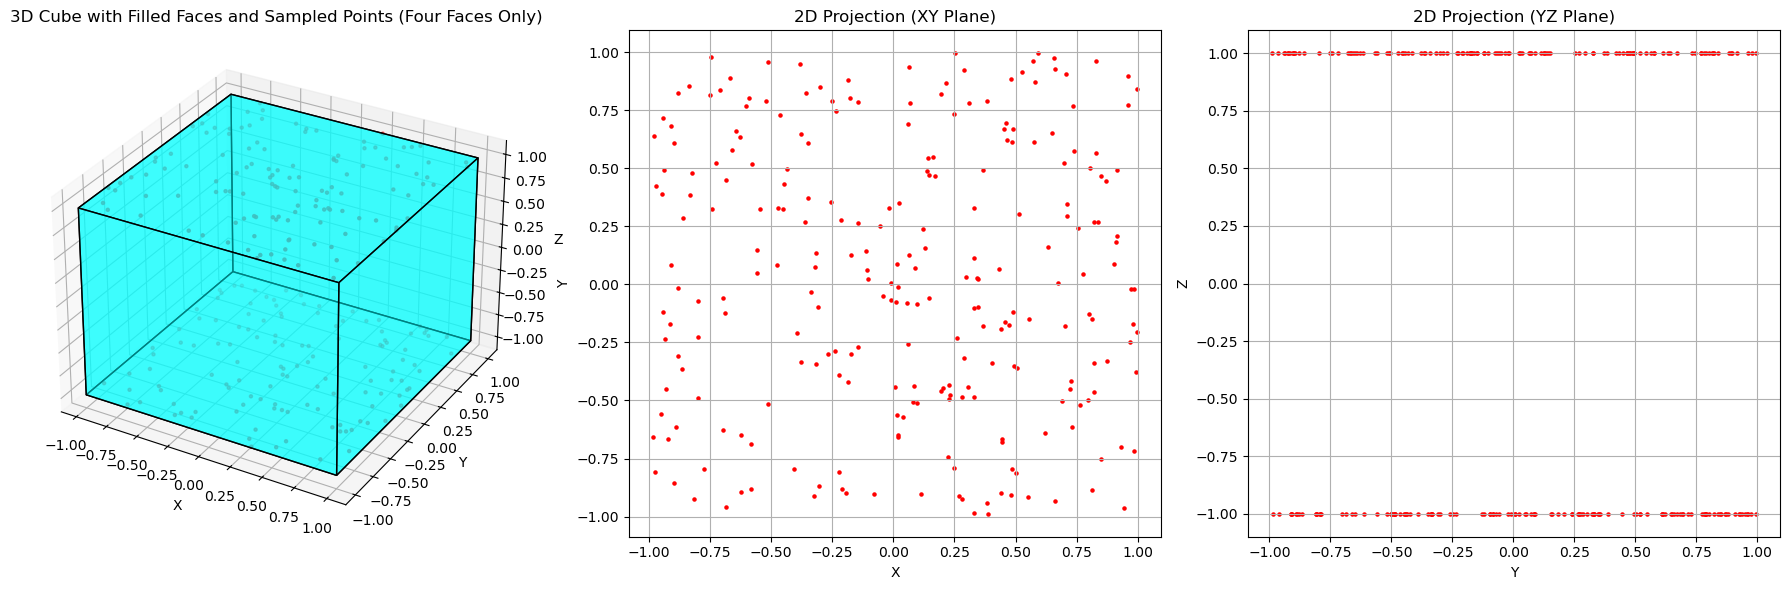

In [39]:

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(131, projection='3d')

# Add filled faces to the cube
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', edgecolors='k', alpha=0.5))

# Sample points on four non-parallel faces of the cube (exclude ±X faces)
num_points = 500
samples = []
# # Sampling on ±Y faces
# for y in [-1, 1]:
#     x = np.random.uniform(-1, 1, num_points // 4)
#     z = np.random.uniform(-1, 1, num_points // 4)
#     samples.append(np.column_stack((x, np.full_like(x, y), z)))

# Sampling on ±Z faces
for z in [-1, 1]:
    x = np.random.uniform(-1, 1, num_points // 4)
    y = np.random.uniform(-1, 1, num_points // 4)
    samples.append(np.column_stack((x, y, np.full_like(x, z))))

sampled_points = np.vstack(samples)

# Plot the sampled points on the 3D cube
ax.scatter(sampled_points[:, 0], sampled_points[:, 1], sampled_points[:, 2], c='r', s=5)
ax.set_title('3D Cube with Filled Faces and Sampled Points (Four Faces Only)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 2D Projection of Sampled Points (XY plane)
plt.subplot(132)
plt.scatter(sampled_points[:, 0], sampled_points[:, 1], c='r', s=5)
plt.title('2D Projection (XY Plane)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

# 2D Projection of Sampled Points (YZ plane)
plt.subplot(133)
plt.scatter(sampled_points[:, 1], sampled_points[:, 2], c='r', s=5)
plt.title('2D Projection (YZ Plane)')
plt.xlabel('Y')
plt.ylabel('Z')
plt.grid()

plt.tight_layout()
plt.show()


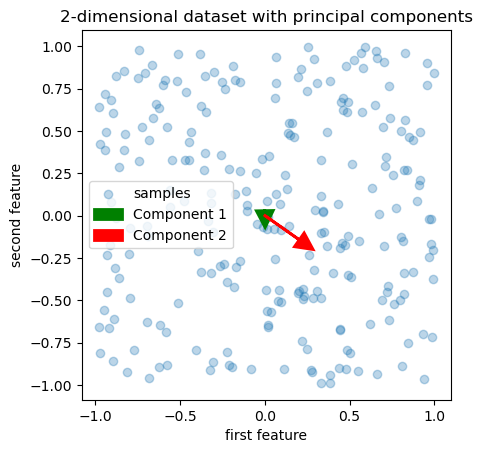

[1.00735253 0.34842404]


In [47]:
X = sampled_points

pca = PCA(n_components=2).fit(X)

plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    arrow_color = 'green' if i == 0 else 'red'
    plt.arrow(
        0, 0, comp[0], comp[1],
        head_width=0.1, head_length=0.1,
        fc=arrow_color, ec=arrow_color,
        length_includes_head=True,
        label=f"Component {i+1}",
        linewidth=2,
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()
print(pca.explained_variance_)

In [37]:
pca.components_

array([[ 0.00123653,  0.70866883, -0.70554019],
       [ 0.02519999,  0.70529459,  0.7084663 ]])

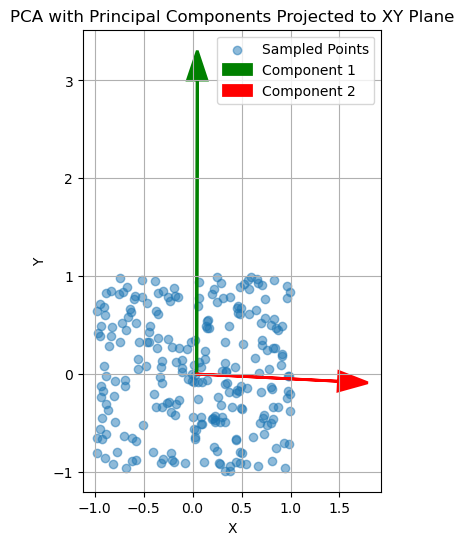

Explained variance: [1.00735253 0.34842404]


In [52]:
# Plot the original data with the principal components and their projection onto the XY plane
plt.figure(figsize=(10, 6))
plt.scatter(sampled_points[:, 0], sampled_points[:, 1], alpha=0.5, label="Sampled Points")

# Add arrows for the principal components
mean_point = np.mean(sampled_points, axis=0)
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    # Project the components onto the original space (scaled by variance)
    comp_scaled = comp * np.sqrt(var) * 3  # Adjust scaling for visibility
    arrow_color = 'green' if i == 0 else 'red'
    # Plot the full component arrow projected onto the XZ plane
    plt.arrow(
        mean_point[0], mean_point[2],
        comp_scaled[0], comp_scaled[2],
        head_width=0.2, head_length=0.3, fc=arrow_color, ec=arrow_color,
        label=f"Component {i+1}", linewidth=2
    )

# Configure the plot
plt.gca().set(
    aspect="equal",
    title="PCA with Principal Components Projected to XY Plane",
    xlabel="X",
    ylabel="Y",
)
plt.legend()
plt.grid()
plt.show()

# Print the explained variance for the PCA components
print("Explained variance:", pca.explained_variance_)


### General PCA

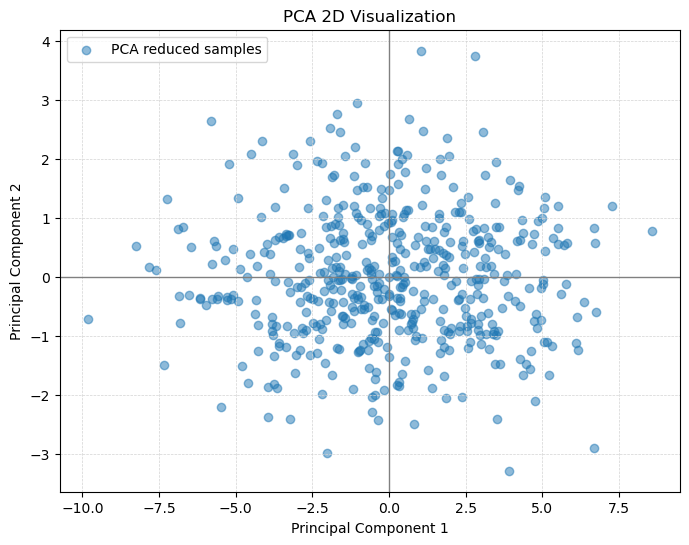

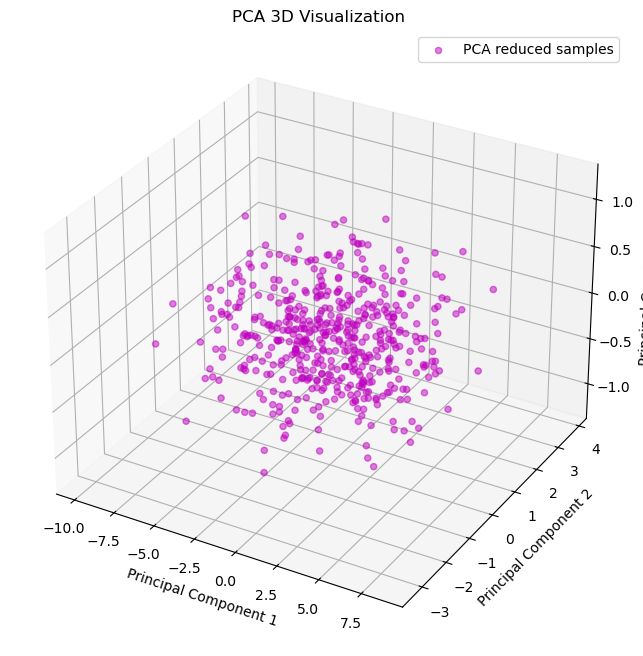

In [11]:
# Set random seed for reproducibility
rng = np.random.RandomState(0)

# Generate higher-dimensional random data
n_samples = 500
n_features = 5
cov_matrix = rng.rand(n_features, n_features)
cov_matrix = np.dot(cov_matrix, cov_matrix.transpose())  # Make it symmetric and positive-definite
X_high_dim = rng.multivariate_normal(mean=np.zeros(n_features), cov=cov_matrix, size=n_samples)

# Apply PCA and fit to the high-dimensional data
pca_2d = PCA(n_components=2).fit(X_high_dim)
pca_3d = PCA(n_components=3).fit(X_high_dim)
X_pca_2d = pca_2d.transform(X_high_dim)
X_pca_3d = pca_3d.transform(X_high_dim)

# Plotting the 2D visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5, label="PCA reduced samples")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Visualization')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Plotting the 3D visualization
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], alpha=0.5, c='m', marker='o', label="PCA reduced samples")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA 3D Visualization')
plt.legend()
plt.show()

In [12]:
scaler_generic = StandardScaler()
pca_general = PCA(n_components=5).fit(X_high_dim)
pca_general.explained_variance_ratio_

array([8.72198503e-01, 1.11162321e-01, 1.48165618e-02, 1.60635768e-03,
       2.16256733e-04])

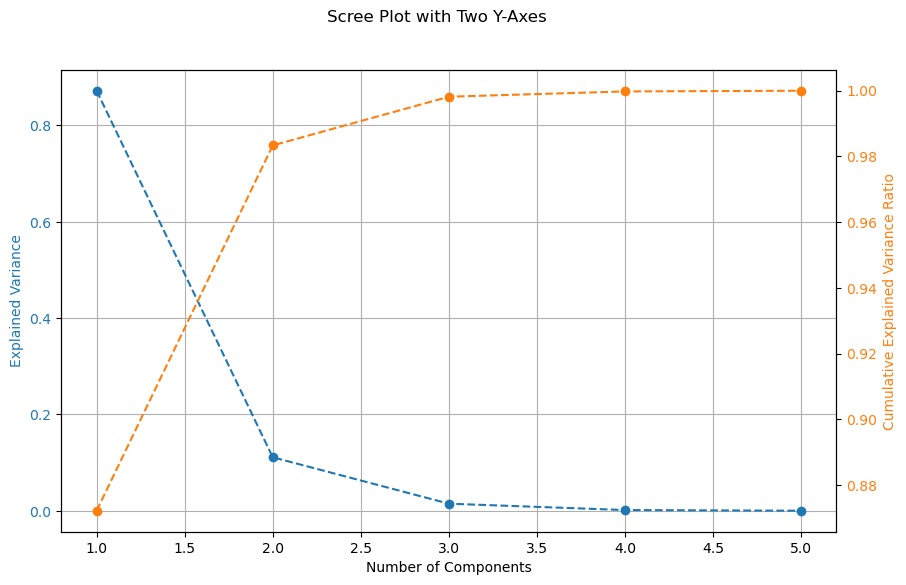

In [13]:
explained_variance = pca_general.explained_variance_ratio_
# Create a merged plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot explained variance on the first y-axis (left)
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Explained Variance', color='tab:blue')
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='tab:blue', label='Explained Variance')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid()

cumulative_explained_variance_ratio = np.cumsum(explained_variance)
# Create a second y-axis (right) for the cumulative explained variance ratio
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Explained Variance Ratio', color='tab:orange')
ax2.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, 
         marker='o', linestyle='--', color='tab:orange', label='Cumulative Explained Variance Ratio')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add title and show the plot
fig.suptitle('Scree Plot with Two Y-Axes')
plt.show()


- The two scree plots depict how the principal components contribute to explaining the variance within the dataset, with the first plot detailing individual component variance and the second illustrating cumulative variance.
  - The first plot indicates that the majority of the variance is captured by the first principal component, as seen by the significant drop in explained variance from the first to the second component. This suggests that the first component is highly significant.
  - The second plot complements the first by showing the cumulative explained variance, which quickly reaches a plateau. This indicates that additional components beyond the first few provide diminishing returns in terms of explaining more variance.

- The "elbow" method, observed in the first plot, suggests that the optimal number of principal components to retain would be where the elbow occurs — in this case, after the first or second component.
- The cumulative plot's plateau reinforces the idea from the elbow method that only a few components are needed to capture most of the variance in the data.

Notes for notebook, remove later:
* how to plot and how to look up the documentation
* explain the methods in detail, step by step
* show linear models with feature selection (use check boxes)
* show their performances
* show simple pcr and compare to linear regression
* show pls and compare predictive powers
    * ask for problems with single data point analysis (if we don't know true value, best choice and why?)
* show cases where LR performs better than PLS
    * show visualtion of the intrinsic dimension

In [3]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


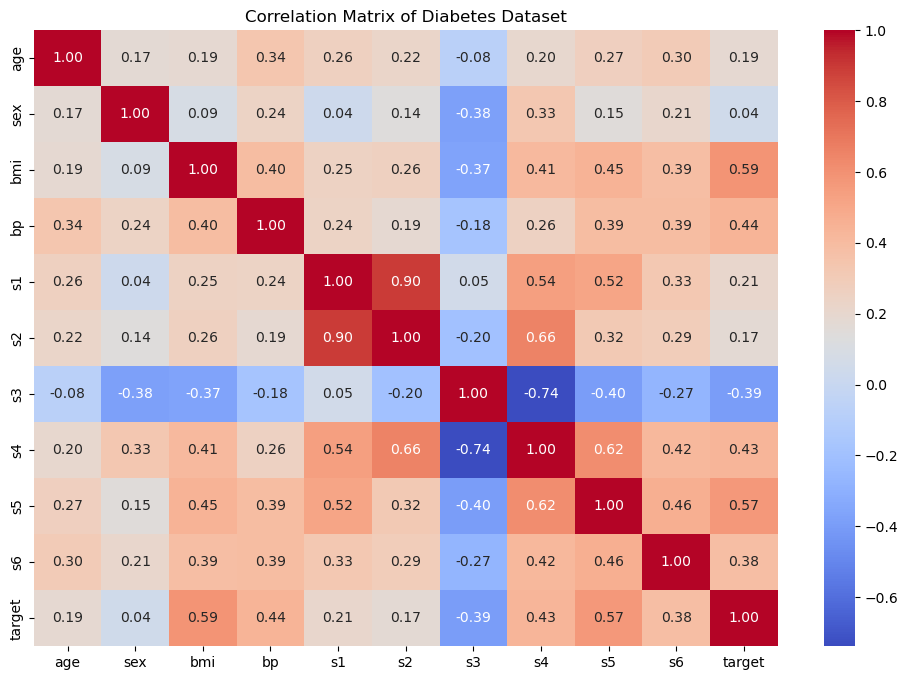

In [6]:
corr_matrix = diabetes_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

In [21]:
X_train.shape, y_train.shape

((353, 10), (353,))

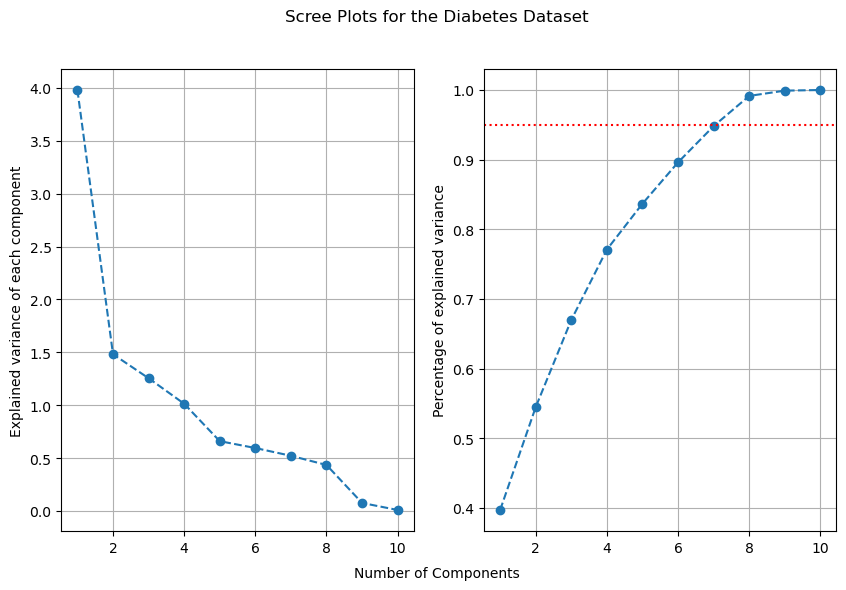

In [17]:
scaler_new = StandardScaler().fit(X_train)
pca_new = PCA(n_components=10).fit(scaler_new.transform(X_train))
fig, ax = plt.subplots(1,2, sharex=True, figsize=(10, 6))
fig.suptitle('Scree Plots for the Diabetes Dataset')
ax[0].plot(range(1, len(pca_new.explained_variance_ratio_) + 1), pca_new.explained_variance_, marker='o', linestyle='--')
ax[0].set_ylabel('Explained variance of each component')
ax[0].grid(True)

ax[1].plot(range(1, len(pca_new.explained_variance_ratio_) + 1), np.cumsum(pca_new.explained_variance_ratio_), marker='o', linestyle='--')
ax[1].axhline(y=0.95, color='r', linestyle='dotted')
ax[1].set_ylabel('Percentage of explained variance')
ax[1].grid(True)

fig.text(0.5, 0.04, 'Number of Components', ha='center', va='center')
plt.show()

In [18]:
import skdim

In [20]:
danco = skdim.id.DANCo().fit(X_train)
lpca = skdim.id.lPCA().fit_pw(X_train,
                              n_neighbors = 100,
                              n_jobs = 1)

#get estimated intrinsic dimension
print("Global dimension", danco.dimension_)
print("Local dimension", lpca.dimension_pw_, np.mean(lpca.dimension_pw_))

Global dimension 6.971498265520762
Local dimension [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8] 8.0


## Evaluating models

In [18]:
single_data_point = X_test[0].reshape(1, -1)  # shape: (1, n_features)

# Make predictions
pred_lr  = lr.predict(single_data_point)[0]    # scalar or 1D array
pred_pcr = pcr.predict(single_data_point)[0]   # scalar or 1D array
pred_pls = pls.predict(single_data_point)[0]   # scalar or 1D array

# Print out the predictions
print(f"Single data point from X_test: {single_data_point}")
print(f"Linear Regression prediction: {pred_lr}")
print(f"PCR (PCA + LR) prediction:    {pred_pcr}")
print(f"PLS prediction:               {pred_pls}")
print(f"True value:                   {y_test[0]}")

Single data point from X_test: [[ 0.04534098 -0.04464164 -0.00620595 -0.01599898  0.1250187   0.1251981
   0.019187    0.03430886  0.03243232 -0.0052198 ]]
Linear Regression prediction: 139.54755840379613
PCR (PCA + LR) prediction:    163.81021518618954
PLS prediction:               130.63153589672152
True value:                   219.0


In [19]:
single_data_point = X_train[0].reshape(1, -1)  # shape: (1, n_features)

# Make predictions
pred_lr  = lr.predict(single_data_point)[0]    # scalar or 1D array
pred_pcr = pcr.predict(single_data_point)[0]   # scalar or 1D array
pred_pls = pls.predict(single_data_point)[0]   # scalar or 1D array

# Print out the predictions
print(f"Single data point from X_train:{single_data_point}")
print(f"Linear Regression prediction: {pred_lr}")
print(f"PCR (PCA + LR) prediction:    {pred_pcr}")
print(f"PLS prediction:               {pred_pls}")
print(f"True value:                   {y_test[0]}")

Single data point from X_train:[[ 0.07076875  0.05068012  0.01211685  0.0563009   0.03420581  0.04941617
  -0.03971921  0.03430886  0.02736405 -0.0010777 ]]
Linear Regression prediction: 184.69998932447166
PCR (PCA + LR) prediction:    202.09937658996503
PLS prediction:               182.2891383857713
True value:                   219.0


In [38]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

In [33]:
def report_generalisation_errors(metric=mean_squared_error, metric_name="MSE", n_comps=6, verbose=False):
    # ------------------------------
    # Assume X_train, X_test, y_train, y_test already exist
    # and X is 1D or we're focusing on the first column of X
    # ------------------------------
    
    # -------------------------
    # (A) Simple Linear Regression
    # -------------------------

    printv = print if verbose else lambda *x: None
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    
    mse_lr = metric(y_test, y_pred_lr)
    printv(f"MSE (Linear Regression): {mse_lr}")
    # print(f"Relative MSE (LR): {mse_lr / np.average(y_test ** 2)}\n")
    
    
    # -------------------------
    # (B) PCR: PCA + Linear Regression
    # -------------------------
    pcr = Pipeline([
        ("standardscaler", StandardScaler()),
        ("pca", PCA(n_components=n_comps)),
        ("lr", LinearRegression())
    ])
    pcr.fit(X_train, y_train)
    y_pred_pcr = pcr.predict(X_test)
    
    mse_pcr = metric(y_test, y_pred_pcr)
    printv(f"MSE (PCR): {mse_pcr}")
    # print(f"Relative MSE (PCR): {mse_pcr / np.average(y_test ** 2)}\n")
    
    
    # -------------------------
    # (C) PLS
    # -------------------------
    pls = PLSRegression(n_components=n_comps)
    pls.fit(X_train, y_train)
    y_pred_pls = pls.predict(X_test)
    
    mse_pls = metric(y_test, y_pred_pls)
    printv(f"MSE (PLS): {mse_pls}")
    # print(f"Relative MSE (PLS): {mse_pls / np.average(y_test ** 2)}\n")

    return mse_lr, mse_pcr, mse_pls


In [34]:
report_generalisation_errors(r2_score, "r2_score")

(0.4526027629719196, 0.43801982193121125, 0.4631964223665963)

In [35]:
report_generalisation_errors(mean_squared_error, "MSE")

(2900.1936284934804, 2977.4562630668242, 2844.066813448385)

In [36]:
report_generalisation_errors(explained_variance_score, "explained_variance_score")

(0.4554925102890147, 0.4415576714920365, 0.4661262357490493)

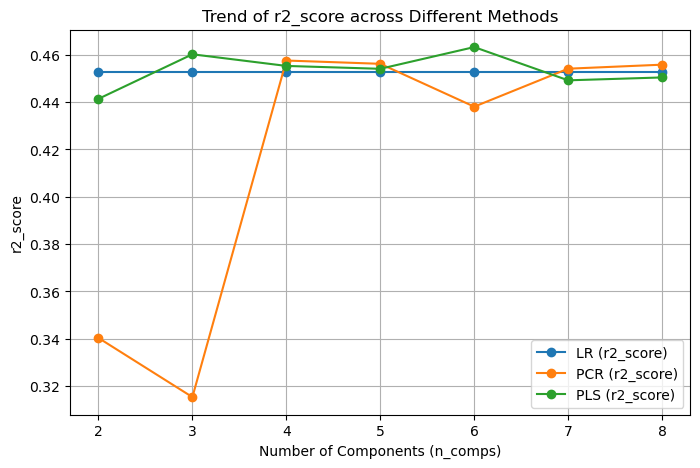

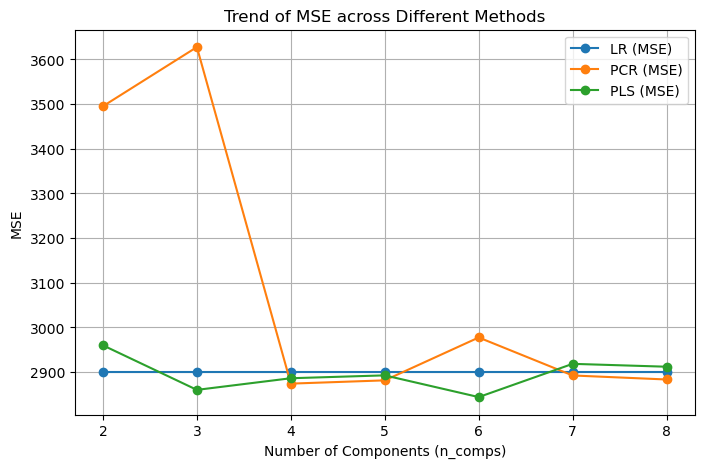

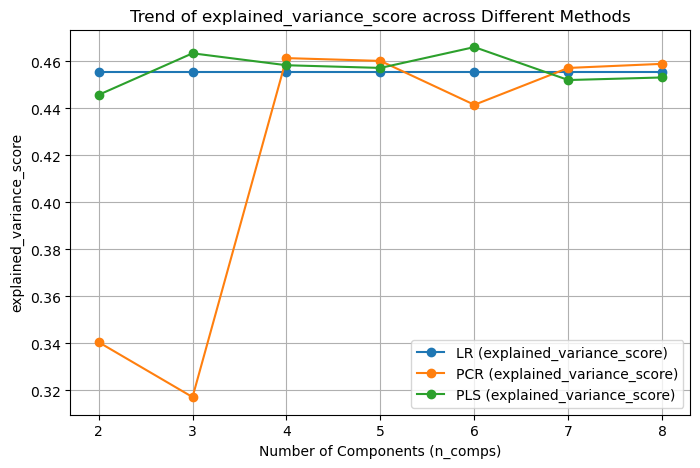

In [37]:

metrics_list = [
    (r2_score, "r2_score"),
    (mean_squared_error, "MSE"),
    (explained_variance_score, "explained_variance_score")
]
# results = {
#     "r2_score": {"LR": [], "PCR": [], "PLS": []},
#     "MSE": {"LR": [], "PCR": [], "PLS": []},
#     "explained_variance_score": {"LR": [], "PCR": [], "PLS": []},
# }
results = {
    name[1]: {"LR": [], "PCR": [], "PLS": []} for name in metrics_list
}
n_comps_range = range(2, 9)


for error, error_name in metrics_list:
    for n_comps in n_comps_range:
        metric_lr, metric_pcr, metric_pls = report_generalisation_errors(error, error_name, n_comps)
        results[error_name]["LR"].append(metric_lr)
        results[error_name]["PCR"].append(metric_pcr)
        results[error_name]["PLS"].append(metric_pls)

for metric_name, methods_results in results.items():
    plt.figure(figsize=(8, 5))
    for method_name, values in methods_results.items():
        plt.plot(n_comps_range, values, label=f"{method_name} ({metric_name})", marker='o')
    
    plt.title(f"Trend of {metric_name} across Different Methods")
    plt.xlabel("Number of Components (n_comps)")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid()
    plt.show()


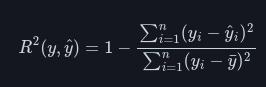
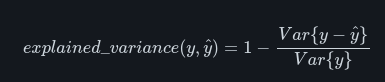
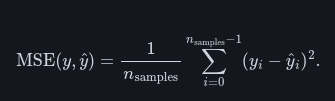